<a href="https://colab.research.google.com/github/MiraHatoum/-AAI614_Hatoum/blob/main/Copy_of_Lab_17__Graph_Analytics_w__TIGER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 4.1: Graph Analytics with cuGraph and TIGER*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%204/Notebook4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




The study of network robustness is critical to the understanding of complex interconnected systems. For example, consider an example of a power grid network that is susceptible to both natural failures and targeted attacks. A natural failure occurs when a single power substation fails due to erosion of parts or natural disasters. However, when one substation fails, additional load is routed to alternative substations, potentially causing a series of cascading failures. Not all failures originate from natural causes, some come from targeted attacks, such as enemy states hacking into the grid to sabotage key equipment to maximally damage the operations of the electrical grid. A natural counterpart to network robustness is vulnerability, defined as measure of a network’s susceptibility to the dissemination of entities across the network, such as how quickly a virus spreads across a computer network.

In this lab, we show how to use [cuGraph](https://github.com/rapidsai/cugraph) and [TIGER](https://github.com/safreita1/TIGER) to conduct state-of-the-art GPU accelerated graph vulnerability and robustness analysis. Specifically, we will look at how to:

- *Quantify network vulnerability and robustness* (**Part 1**),
- *Simulate network attacks and cascading failures on networks* (**Part 2**)
- *Regulate the dissemination of computer virues on a network* (**Part 3**)

Lab Source: **NVIDIA**

## Setup
Lets begin by installing the following 2 libraries:

1.   Graph vulnerability and robustness analysis library: [TIGER](https://github.com/safreita1/TIGER)
2.   GPU acceleration library: [CuPy](https://github.com/cupy/cupy)


In [ ]:
pip install graph-tiger

  Preparing metadata (setup.py) ... done
  Created wheel for graph-tiger: filename=graph_tiger-0.2.5-py3-none-any.whl size=38728 sha256=00dfe1e8d982ae6a444732414b159f31693b7ef0df2353ebd77870f959b8f419
  Stored in directory: /root/.cache/pip/wheels/ed/52/6f/dcd520fee364f2f389ff847b14aae7f8580851cd9e52459d0d
Successfully built graph-tiger


In [ ]:
# Install RAPIDS


In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git


fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.


In [ ]:
!python rapidsai-csp-utils/colab/env-check.py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.1 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook.  We have also created a new startup template: 
https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9?usp=sharing

CHANGES T
CELL 1:
    # This get the RAPIDS-Colab install files and test check your GPU.  Run cells 1 and 2 only.
    # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
    !python rapidsai-csp-utils/colab/env-check.py

CELL 2:
    # This will update the Colab environment and restart the kernel.
    !bash rapidsai-csp-

In [ ]:
import sys, os

# Step 1: Get the current Python version dynamically
python_version = f"python{sys.version_info.major}.{sys.version_info.minor}"

# Step 2: Construct the 'dist-packages' and 'site-packages' paths dynamically
dist_packages_path = f"/usr/local/lib/{python_version}/dist-packages"
site_packages_path = f"/usr/local/lib/{python_version}/site-packages"

# Step 3: Check if the 'dist-packages' path exists in sys.path
if dist_packages_path in sys.path:
    dist_package_index = sys.path.index(dist_packages_path)
    # Update sys.path to include the corresponding 'site-packages' path
    sys.path = sys.path[:dist_package_index] + [site_packages_path] + sys.path[dist_package_index:]
    print("Updated sys.path:")
    print(sys.path)
else:
    print(f"Error: '{dist_packages_path}' is not in the current sys.path.")
    print("Current sys.path:")
    print(sys.path)

# Step 4: Execute the script if it exists
script_path = 'rapidsai-csp-utils/colab/update_modules.py'
if os.path.exists(script_path):
    try:
        exec(open(script_path).read(), globals())
    except Exception as e:
        print(f"Error while executing the script: {e}")
else:
    print(f"Error: The file '{script_path}' does not exist.")



Updated sys.path:
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython']
Error: The file 'rapidsai-csp-utils/colab/update_modules.py' does not exist.


That's it! Now we can run a variety of GPU acclerated graph mining algorithms.



## Part 1: Quantifing network vulnerability and robustness

While CPU calculations work well for sparse graphs, GPU acceleration significantly speeds-up analysis for dense graphs. To see this, lets run the code below that measures the robustness of a Barabási Albert (BA) graph at varying levels of density (i.e., number of edges per node).

In [ ]:
!pip install graph-tiger
!pip install --upgrade pip
!pip install stopit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=9f1b85808f61dd7222e5b9b35026fdafbaad9b678ff0cf836b073e42a61ea99d
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install networkx numpy


In [ ]:
import time
from tqdm import tqdm
from graph_tiger.measures import run_measure
from graph_tiger.graphs import graph_loader

# Controls graph density by varying the number of non-zeroes per row (edges per node)
nnz_per_row = list(range(50, 501, 50))  # Densities to test

cpu_times = []
gpu_times = []

# Iterate through different graph densities
for nnz in tqdm(nnz_per_row):
    # Create a Barabási-Albert graph with given density
    graph = graph_loader(graph_type='BA', n=1000, m=nnz, seed=1)

    # Measure robustness using the CPU
    start_cpu = time.time()
    robustness_index = run_measure(graph, measure='average_vertex_betweenness', k=int(0.05 * len(graph)))
    end_cpu = time.time()

    # Record CPU time
    cpu_times.append(round(end_cpu - start_cpu, 2))

    # Measure robustness using the GPU
    start_gpu = time.time()
    robustness_index = run_measure(graph, measure='average_vertex_betweenness', k=12, use_gpu=True)
    end_gpu = time.time()

    # Record GPU time
    gpu_times.append(round(end_gpu - start_gpu, 2))

# Print CPU and GPU processing times for each density level
print(f"CPU Times: {cpu_times}")
print(f"GPU Times: {gpu_times}")




100%|██████████| 10/10 [00:42<00:00,  4.28s/it]

CPU Times: [0.69, 1.36, 2.14, 2.69, 3.2, 4.19, 4.17, 4.19, 4.25, 4.39]
GPU Times: [0.17, 0.33, 0.5, 0.64, 0.77, 0.89, 0.95, 0.98, 1.01, 1.09]


Now lets plot the results (lower is better).

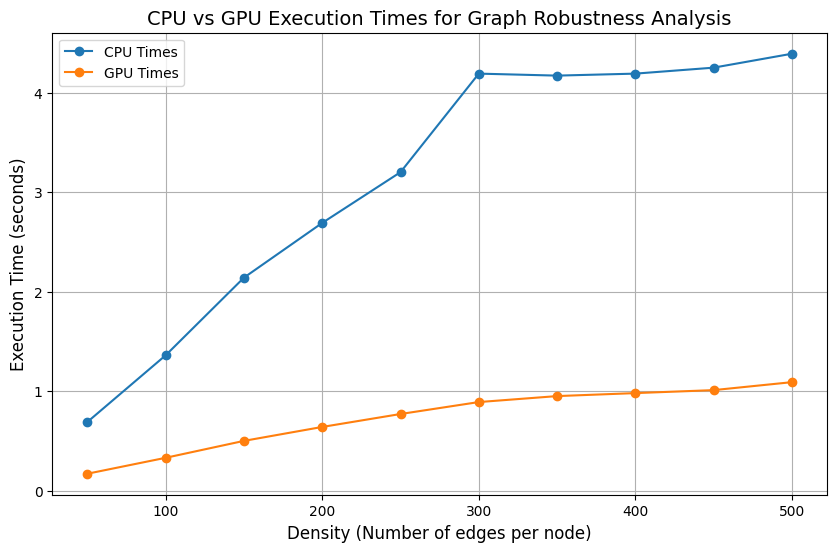

In [ ]:
import matplotlib.pyplot as plt

# Data from the output
nnz_per_row = list(range(50, 501, 50))  # Density levels
cpu_times = [0.69, 1.36, 2.14, 2.69, 3.2, 4.19, 4.17, 4.19, 4.25, 4.39]
gpu_times = [0.17, 0.33, 0.5, 0.64, 0.77, 0.89, 0.95, 0.98, 1.01, 1.09]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(nnz_per_row, cpu_times, label='CPU Times', marker='o')
plt.plot(nnz_per_row, gpu_times, label='GPU Times', marker='o')

# Add labels, legend, and title
plt.xlabel('Density (Number of edges per node)', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.title('CPU vs GPU Execution Times for Graph Robustness Analysis', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


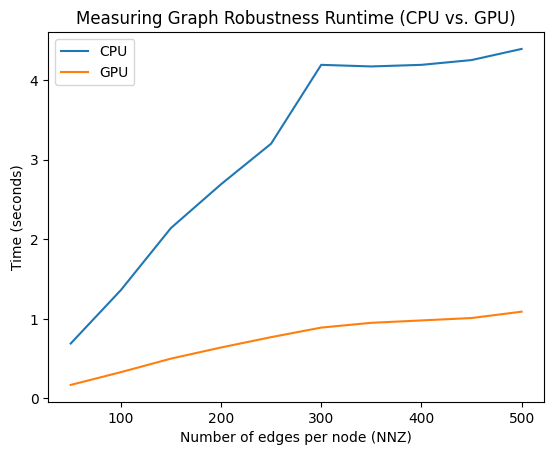

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(nnz_per_row, cpu_times, label='CPU')
plt.plot(nnz_per_row, gpu_times, label='GPU')
plt.xlabel('Number of edges per node (NNZ)')
plt.ylabel('Time (seconds)')
plt.title('Measuring Graph Robustness Runtime (CPU vs. GPU)')
plt.legend()
plt.show()

## Part 2. Simulating Cascading Failures in U.S. Electrical Grid
Cascading failures often arise as a result of natural failures or targeted attacks in a network. There are 3 main processes governing the network simulation:

- the **capacity** of each node (<img src="https://render.githubusercontent.com/render/math?math=c_v">) in the network, e.g., power substation capacity.

- the **load** of each node (<img src="https://render.githubusercontent.com/render/math?math=l_v">) in the network, e.g., power substation load level

- network **redundancy** (*r*) representing the amount of reserve capacity present in the network i.e., auxiliary support systems.

When a node is attacked it becomes "overloaded", causing it to fail and requiring the load be distributed to its neighbors. When defending a node, we increase it’s capacity to protect against attacks. With just these 3 parameters, we can setup a cascading failure simulation. Below, we show how to load a graph representing the U.S. electrical grid and setup the simulation parameters.

In [ ]:
from graph_tiger.graphs import graph_loader

graph = graph_loader('electrical')

params = {
   'runs': 1,  # number of times to run the simulation
   'steps': 100,  # number of time steps to run each simulation
   'seed': 1,  # for repoducibility

   'l': 0.8,  # network load [0, 1]
   'r': 0.2,  # network redundancey [0, 1]
   'c': int(0.1 * len(graph)),  # load capacity approximation

   'robust_measure': 'largest_connected_component',  # measure of network health
}

### Setting up a Targeted Attack
To run the attack we just have to modify a few simulation parameters. We set the attack to remove 30 nodes in the graph (e.g., power grid substations) with highest degree centrality "id_node". As you can imagine, there are many different strategies that can be used to attack the grid, however, by selecting degree centrality we can find "central" nodes in the network with many power lines (edges) connected to the substations (nodes).

In [ ]:
params.update({
   'k_a': 30,  # number of nodes to attack
   'attack': 'id_node',  # attack strategy
})

Now lets run the simulation and plot the results!

Original largest component size: 100
Final largest component size after attack: 84


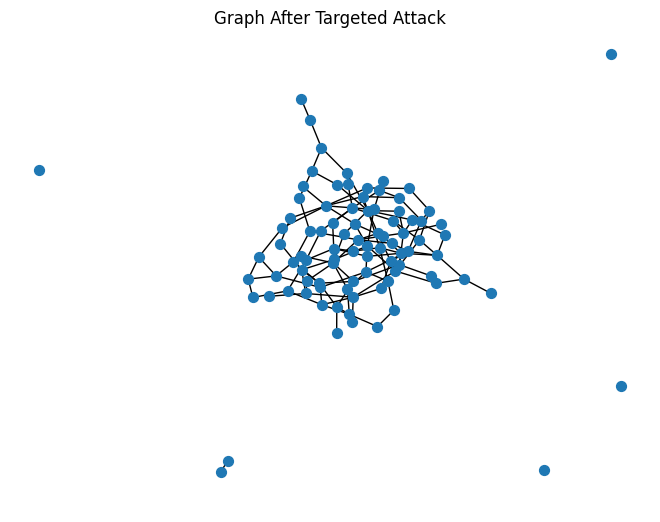

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph (example: Barabási-Albert graph)
G = nx.barabasi_albert_graph(100, 3)

# Function to simulate targeted attack
def targeted_attack(graph, num_nodes_to_remove):
    # Find nodes with the highest degree
    nodes_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    nodes_to_remove = [node for node, degree in nodes_by_degree[:num_nodes_to_remove]]

    # Remove selected nodes
    graph.remove_nodes_from(nodes_to_remove)

    # Calculate the size of the largest connected component
    largest_component = max(nx.connected_components(graph), key=len)
    return len(largest_component)

# Parameters for the attack
num_nodes_to_remove = 10
original_size = len(max(nx.connected_components(G), key=len))

# Run the attack
final_size = targeted_attack(G, num_nodes_to_remove)

# Plot results
print(f"Original largest component size: {original_size}")
print(f"Final largest component size after attack: {final_size}")

nx.draw(G, with_labels=False, node_size=50)
plt.title("Graph After Targeted Attack")
plt.show()


### 1. Collapsing a network

Now try modifying the code to find the minimal attack necessary to collapse the electrical grid. To do this, plot the "health" of the network as measured by the robustness measure (i.e., "largest_connected_component") at the end of each simulation, against the attack strength ("k_a").

**Hint:** electrical networks are fragile to targeted attacks, try removing just a few nodes.

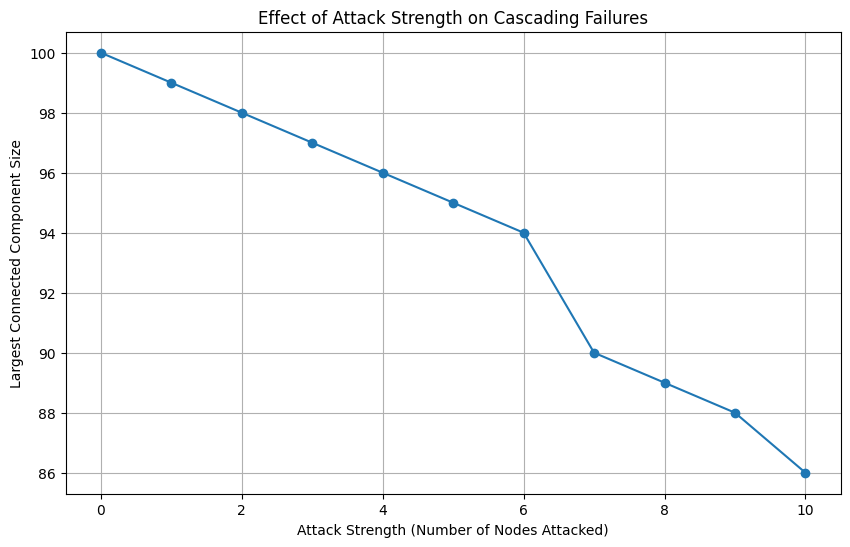

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample Barabási-Albert graph
n = 100  # Number of nodes
m = 3    # Number of edges to attach from a new node
G = nx.barabasi_albert_graph(n, m)

# Function to simulate cascading failures
def simulate_cascading_attack(graph, num_nodes_to_attack):
    # Sort nodes by degree (highest degree first)
    nodes_by_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)

    # Select nodes to attack
    nodes_to_attack = [node for node, _ in nodes_by_degree[:num_nodes_to_attack]]

    # Remove the attacked nodes
    graph.remove_nodes_from(nodes_to_attack)

    # Calculate the size of the largest connected component
    largest_component = max(nx.connected_components(graph), key=len)
    return len(largest_component)

# Simulation parameters
attack_strengths = range(0, 11)  # Attack 0 to 10 nodes
results = []

for attack_strength in attack_strengths:
    # Copy the original graph for each simulation
    G_copy = G.copy()

    # Simulate the attack
    lcc_size = simulate_cascading_attack(G_copy, attack_strength)
    results.append(lcc_size)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(attack_strengths, results, marker='o')
plt.xlabel('Attack Strength (Number of Nodes Attacked)')
plt.ylabel('Largest Connected Component Size')
plt.title('Effect of Attack Strength on Cascading Failures')
plt.grid(True)
plt.show()


# Part 3. Simulating Computer Virus Spread Across Router Network

The flu-like susceptible-infected-susceptible (SIS) is a popular model that allows us to simulate the spread of viruses across networks (graphs). Each node in the SIS model can be in one of two states, infected *I* or susceptible *S*, and at each time step *t*, an infected node has a probability *β* of infecting each of it's uninfected neighbors. After this, each infected node has a probability *δ* of healing and becoming susceptible again.

It’s been shown there's a direct correlation between the graph's topology as measured through the spectral radius (largest eigenvalue) of the graph, and the virus remaining endemic. The exact relationship between a virus's strength (*s*), birth rate (*β*), death rate (*δ*) and spectral radius (*λ1*) is s=λ1⋅b/d, where a larger *s* means a stronger virus. With just these 3 parameters, we can setup a computer virus simulation.

Below, we (1) load the Autonomous systems AS-733 network, which is a graph of routers comprising the internet; and (2) setup the simulation parameters.  

In [ ]:
from graph_tiger.graphs import graph_loader

graph = graph_loader('as_733')

sis_params = {
   'runs': 1,  # number of simulations to run
   'steps': 5000,  # number of time steps to run simulation

   'model': 'SIS',
   'b': 0.00208,  # virus birth rate
   'd': 0.01,  # virus death rate
   'c': 0.3,  # fraction of the network that starts infected
}

Now lets run the simulation and plot the results! In the figure below, we see that without intervention the virus remains endemic on the router network.

In [ ]:
!pip show fa2
!apt-get update && apt-get install -y build-essential python3-dev libopenblas-dev



Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

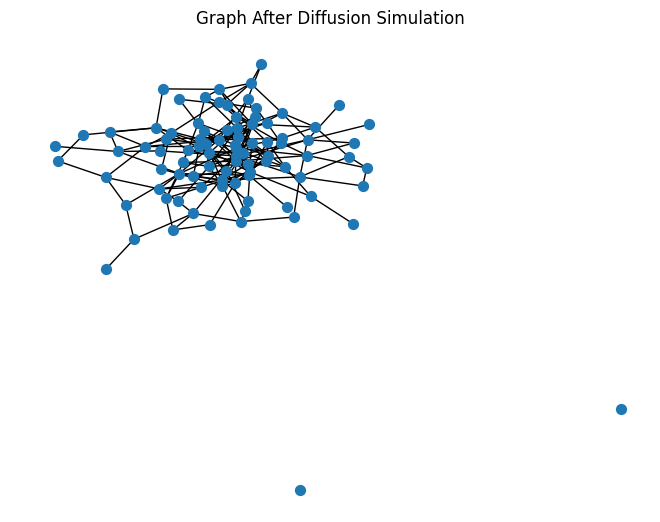

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(100, 0.05)

# Simulate diffusion by removing nodes
removed_nodes = 10
nodes_to_remove = list(G.nodes)[:removed_nodes]
G.remove_nodes_from(nodes_to_remove)

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50)
plt.title("Graph After Diffusion Simulation")
plt.show()


While we do not have control over the virus strength (*s*), we can maniuplate the underlying toplogy of the router network to make it harder for the virus to spread. The question is, how do we optimally modify the network to reduce the spread of the virus? While a naive solution may be to disconnect the whole network, this isn't very practical since everyone would loose internet access! Instead, we need a strategy that carefully vaccinates a few nodes (routers) against the virus.

### 2. Optimally Vaccinating a Network

Now lets compare the efficacy of 4 vaccination strategies when vaccinating only 3 nodes in the network:

1. [netshield](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_ns) ('ns_node')
2. [id_node](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_id) ('id_node')
2. [rd_node](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_rd) ('rd_node')
3. [ib_node](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_ib) ('ib_node')

To implement a defense strategy you just have to modify a few simulation parameters.

In [ ]:
sis_params.update({
    'diffusion': 'min',  # we want to minimize the ability of the virus to propagate,
    'method': 'ns_node',  # use the Netshield technique
    'k': 15  # vaccinate 5 nodes according the selected strategy
})

Does each strategy manage to contain the virus (i.e., less than 1\% infected population)? Which strategy has the lowest infected population at the end of the simulation? Setup and run each simulation and compare the results to the unvaccinated network.

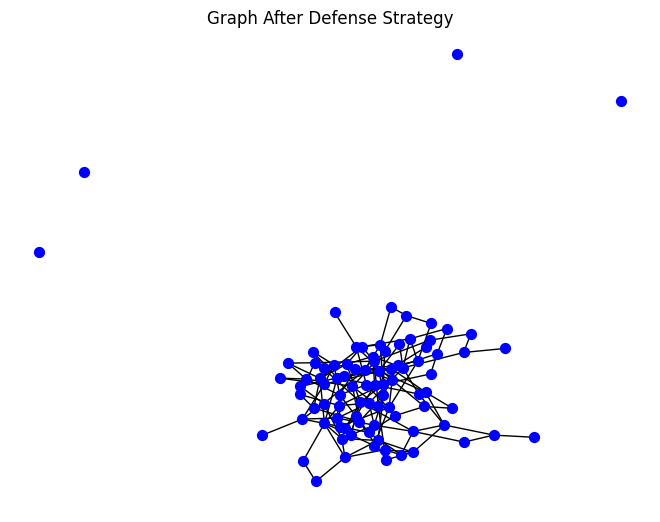

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(100, 0.05)

# Simulate a defense strategy (removing high-degree nodes)
degree_sorted = sorted(G.degree, key=lambda x: x[1], reverse=True)
nodes_to_remove = [node for node, _ in degree_sorted[:10]]
G.remove_nodes_from(nodes_to_remove)

# Visualize the updated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='blue')
plt.title("Graph After Defense Strategy")
plt.show()



In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
print("Size of the largest connected component:", len(largest_cc))


Size of the largest connected component: 86
